**SEASONAL BIKE RENTAL ANALYSIS**

**Business Problem:**
This project aims to optimize bike rental operations in Seoul by leveraging data-driven insights. By analyzing various factors affecting bike rentals, we can improve resource allocation, enhance user experience, and potentially increase revenue for the bike rental service.

**Project Objectives:**
* Identify and quantify the top 3-5 factors influencing bike rental demand in Seoul, providing actionable insights for operational decision-making.
* Develop a regression model to predict hourly bike rental demand with at least 85% accuracy.
* Design and deploy an interactive web application using Streamlit, allowing users to test the regression model through an intuitive interface.

**Specific Questions:**
* What are the most significant factors influencing bike rental demand in Seoul?
How do seasonal changes and weather conditions impact bike rental patterns?
* Are there any trends or patterns in bike rental usage during holidays or specific hours of the day?
* How does air quality (visibility) affect bike rental behavior?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **DATA PREPROCESSING**

## **Dataset Load**

In [2]:
org_data = pd.read_csv('SeoulBikeData.csv', encoding='Windows-1252')
data = org_data

## **Dataset Inspection**

### BASIC CLEANING - DATA TYPE, COLUMN ARRANGEMENT

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#Remove redundant dependent feature through excel inspection
data = data.drop(columns=['Functioning Day'])

#Making the dependent column as the last column
dependent_column = data.pop('Rented Bike Count')
data['Rented Bike Count'] = dependent_column
data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,78


In [6]:
# Combine the Date and Hour columns into a single datetime column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00', format='%d/%m/%Y %H:%M')

# Set the datetime column as the index
data.set_index('datetime', inplace=True)

# Drop the original Date and Hour columns as they are now redundant
data.drop(columns=['Date', 'Hour'], inplace=True)
data.head()


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
datetime,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,254
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,204
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,173
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,107
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,78


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(°C)            8760 non-null   float64
 1   Humidity(%)                8760 non-null   int64  
 2   Wind speed (m/s)           8760 non-null   float64
 3   Visibility (10m)           8760 non-null   int64  
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Solar Radiation (MJ/m2)    8760 non-null   float64
 6   Rainfall(mm)               8760 non-null   float64
 7   Snowfall (cm)              8760 non-null   float64
 8   Seasons                    8760 non-null   object 
 9   Holiday                    8760 non-null   object 
 10  Rented Bike Count          8760 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 821.2+ KB


### EXPLORATION FEATURE SPLIT

In [8]:
#Split the features for exploration
numerical_features = list(data.select_dtypes(include=['int64', 'float64']).columns)
#Exclude the target feature
numerical_features = numerical_features[:-1]
categorical_features = ['Seasons', 'Holiday']
target_feature = ['Rented Bike Count']
#REMEMBER - We have the time series as the index and will explore it at the end

### MISSING VALUES AND DUPLICATES

In [9]:
#Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0
Snowfall (cm),0
Seasons,0
Holiday,0


There are no missing values in the dataset

In [10]:
#Check for duplicate values
duplicate_values = data.duplicated().sum()
duplicate_values

0

*KEY OBSERVATIONS*
* There are no missing or duplicate values in the dataset

## **Target Feature Analysis**

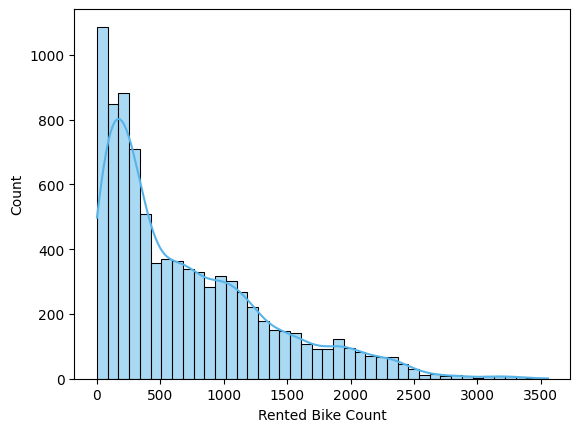

In [11]:
# Create the histogram for the target feature
sns.histplot(data[target_feature[0]], color='#56B4E9', kde=True)
plt.show()

## **Numerical Features Analysis**

### STATISTICAL SUMMARY

In [12]:
data.describe(include='all')

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,NaN
mean,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,704.602055
std,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,644.997468
min,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,191.000000
50%,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,504.500000
75%,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,1065.250000


In [13]:
#Find the mode/frequent value
most_frequent_values = data.mode().iloc[0]
frequencies = data.apply(lambda x: x.value_counts().iloc[0])

# Combine the results into a DataFrame
results = pd.DataFrame({
    'Most Frequent Value': most_frequent_values,
    'Frequency': frequencies
})

results.T

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
Most Frequent Value,19.1,53,1.1,2000.0,0.0,0.0,0.0,0.0,Spring,No Holiday,0.0
Frequency,40,173,420,2245,60,4300,8232,8317,2208,8328,295


### UNI-VARIATE ANALYSIS

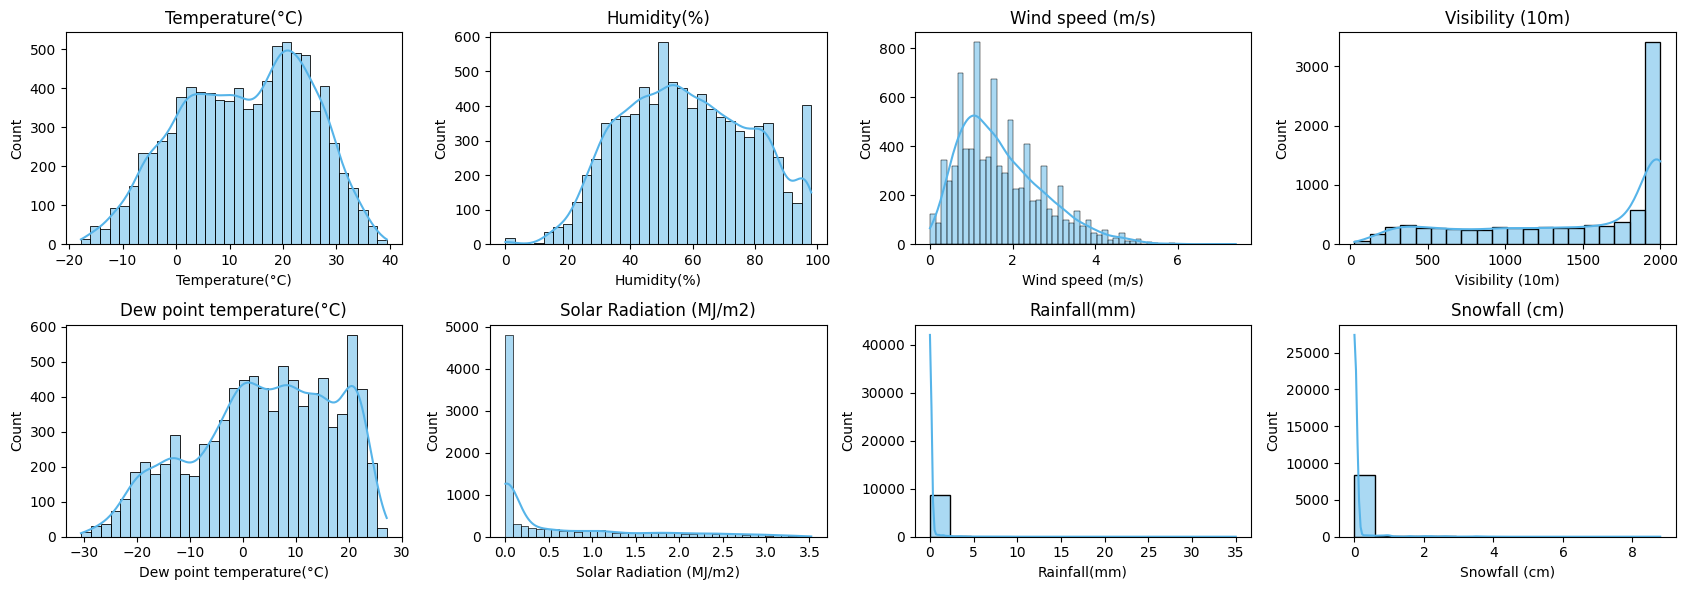

In [14]:
# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot histogram and boxplot
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], ax=axes[i], color='#56B4E9', kde=True)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

*KEY OBSERVATIONS*

Most of the days observed were:
* Lower Wind Speeds
* High Visibility
* Low Solar Radiation
* Low Rainfall and Snowfall



### BI-VARIATE ANALYSIS

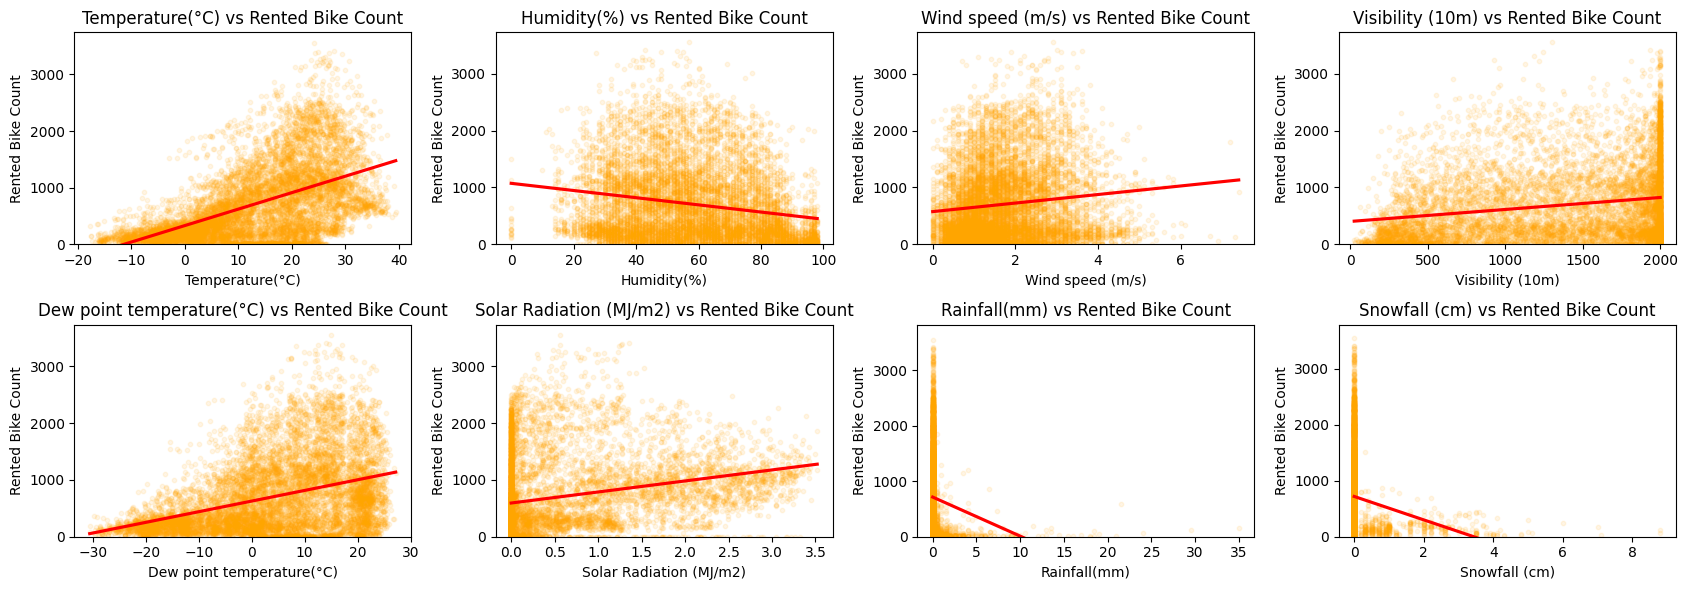

In [15]:
# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot scatterplots
for i, feature in enumerate(numerical_features):
        #Regplot creates a scatter plot and fits a regression line to the data. There won't be any data leakage as regplot calculates and plots a simple linear regression line for the sake of visualization without fitting the model
        sns.regplot(x=data[feature], y=data[target_feature[0]], ax=axes[i],ci=None, line_kws={"color":"red"}, scatter_kws={"color": "orange", "marker": "x", "s": 10, "alpha": 0.1})
        axes[i].set_title(f'{feature} vs {target_feature[0]}')
        axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

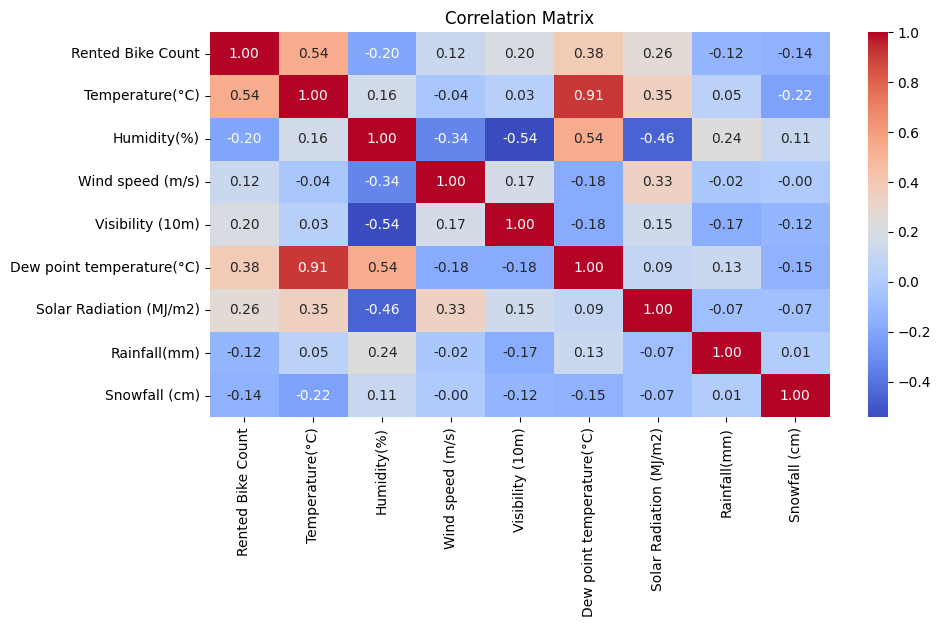

In [16]:
# Add target feature to the list of features for correlation matrix
numerical_target_features = target_feature.copy()
numerical_target_features.extend(numerical_features)

# Compute the correlation matrix
corr_matrix = data[numerical_target_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*KEY OBSERVATIONS*

* Increasing Temperature, Dew and Visibility seem to have the most positive influence on bike rentals
* High rainfall and snowfall seem to have the most negative influence on bike rentals, though they are weakly correlated
* Temperature and Dew: Strong positive correlation, do we need both the variables?
* Humidity and Dew VS Humidity and Temperature: Humidity is moderately correlated with Dew compared to a weak correlation with Temperature. So, this may indicate it might be wise not to drop either Temperature or Dew at this point
* Humidity and Visibility: Moderate negative correlation, indicating that higher humidity often coincides with lower visibility
* Humidity doesn't seem to influence Bike rental drastically as it follows almost a normal distribution with a weak negative correlation




## **Categorical Features Analysis**

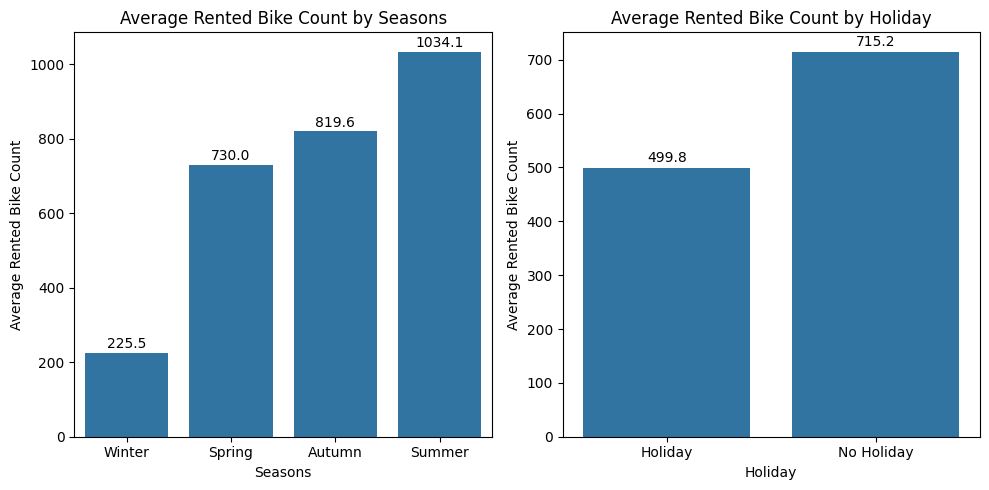

In [17]:
# Initialize the figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Iterate through categorical features and plot on each subplot
for i, feature in enumerate(categorical_features):
    # Calculate the average rented bike count per category
    avg_rented_bike_count = data.groupby(feature)['Rented Bike Count'].mean().sort_values()

    # Create a bar plot on the respective axis
    sns.barplot(ax=axes[i], x=avg_rented_bike_count.index, y=avg_rented_bike_count.values)

    # Add labels on the bars
    for index, value in enumerate(avg_rented_bike_count.values):
        axes[i].text(index, value + 5, f'{value:.1f}', ha='center', va='bottom')

    # Add title and labels
    axes[i].set_title(f'Average Rented Bike Count by {feature}')
    axes[i].set_ylabel('Average Rented Bike Count')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()


*KEY OBSERVATIONS*

On an average, Bike rentals seem to be
* Highest during the summer and lowest during the winter
* Lower during Holidays

## **Time Series Features Analysis**

In [18]:
# Extract additional date features
data['Date'] = data.index.date
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Hour'] = data.index.hour
data['Day Of Week'] = data.index.day_of_week
#Year didn't feel useful as it's a 1 year data with only 1 month from 2017 and rest in 2018

data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count,Date,Month,Day,Hour,Day Of Week
datetime,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,254,2017-12-01,12,1,0,4
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,204,2017-12-01,12,1,1,4
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,173,2017-12-01,12,1,2,4
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,107,2017-12-01,12,1,3,4
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,78,2017-12-01,12,1,4,4


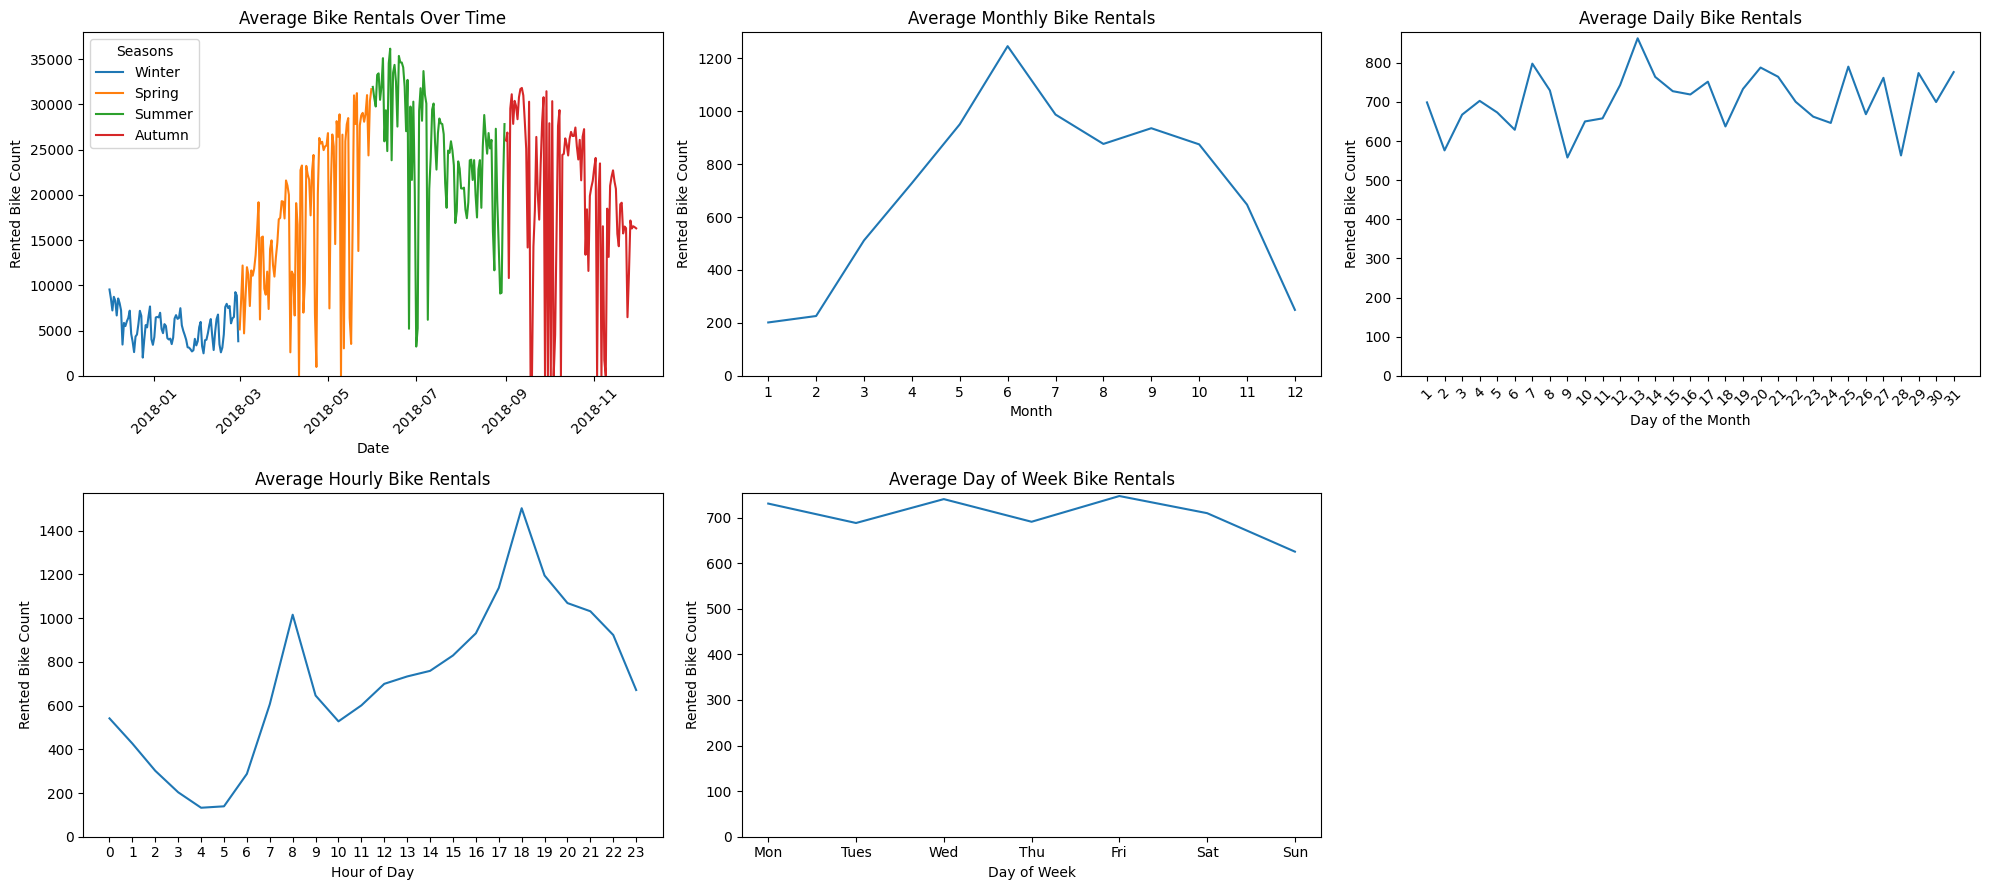

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))

#Daily rentals over time, colored by season
daily_rentals_with_season = data.groupby(['Date', 'Seasons'])['Rented Bike Count'].sum().reset_index()
sns.lineplot(ax=axes[0, 0], data=daily_rentals_with_season, x='Date', y='Rented Bike Count', hue='Seasons', palette='tab10')
axes[0, 0].set(title='Average Bike Rentals Over Time', xlabel='Date', ylabel='Rented Bike Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(0)

#Average monthly rentals
monthly_rentals = data.groupby('Month')['Rented Bike Count'].mean()
sns.lineplot(ax=axes[0, 1], x=monthly_rentals.index, y=monthly_rentals.values)
axes[0, 1].set(title='Average Monthly Bike Rentals', xlabel='Month', ylabel='Rented Bike Count')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_ylim(0)

#Average daily rentals by day of the month
daily_rentals = data.groupby('Day')['Rented Bike Count'].mean()
sns.lineplot(ax=axes[0, 2], x=daily_rentals.index, y=daily_rentals.values)
axes[0, 2].set(title='Average Daily Bike Rentals', xlabel='Day of the Month', ylabel='Rented Bike Count')
axes[0, 2].set_xticks(range(1, 32))
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].set_ylim(0)

#Average hourly rentals
hourly_rentals = data.groupby('Hour')['Rented Bike Count'].mean()
sns.lineplot(ax=axes[1, 0], x=hourly_rentals.index, y=hourly_rentals.values)
axes[1, 0].set(title='Average Hourly Bike Rentals', xlabel='Hour of Day', ylabel='Rented Bike Count')
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].set_ylim(0)

#Average Day of Week rentals
day_name_mapping = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
day_of_week_rentals = data.groupby('Day Of Week')['Rented Bike Count'].mean()
day_of_week_rentals.index = day_of_week_rentals.index.map(day_name_mapping)
sns.lineplot(ax=axes[1, 1], x=day_of_week_rentals.index, y=day_of_week_rentals.values)
axes[1, 1].set(title='Average Day of Week Bike Rentals', xlabel='Day of Week', ylabel='Rented Bike Count')
axes[1, 1].set_ylim(0)

# Hide the last empty plot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

*KEY OBSERVATIONS*

* There is a cyclical pattern with rentals rising as the weather warms up and falling as it gets colder, with noticeable dip during Winter.
* Zero bike rental days were only observed during Spring and Autumn
* There is a clear pattern in bike rentals peaking around 8am and 6pm which corresponds to typical commuting hours
* There is a drop in bike rentals during early morning and late night hours
* Bike rentals seem to be at it's peak during June
* On an average, there is a peak in the 13th day of the month while a decline in the 9th and 28th day of the month.
* Though not significant, there is a drop in bike rentals on Sunday
* These Datetime derived features seem to affect the target feature

In [20]:
#Dropping the Date Column
data = data.drop(columns = 'Date')

#Make the Target feature as the last column
dependent_column = data.pop('Rented Bike Count')
data['Rented Bike Count'] = dependent_column

#Modifying the Time series feature list
time_series_features = ['Month','Day','Hour','Day Of Week']

In [21]:
data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day,Hour,Day Of Week,Rented Bike Count
datetime,,,,,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,0,4,254
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,1,4,204
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,12,1,2,4,173
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,3,4,107
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,12,1,4,4,78


## **Outlier Detection**

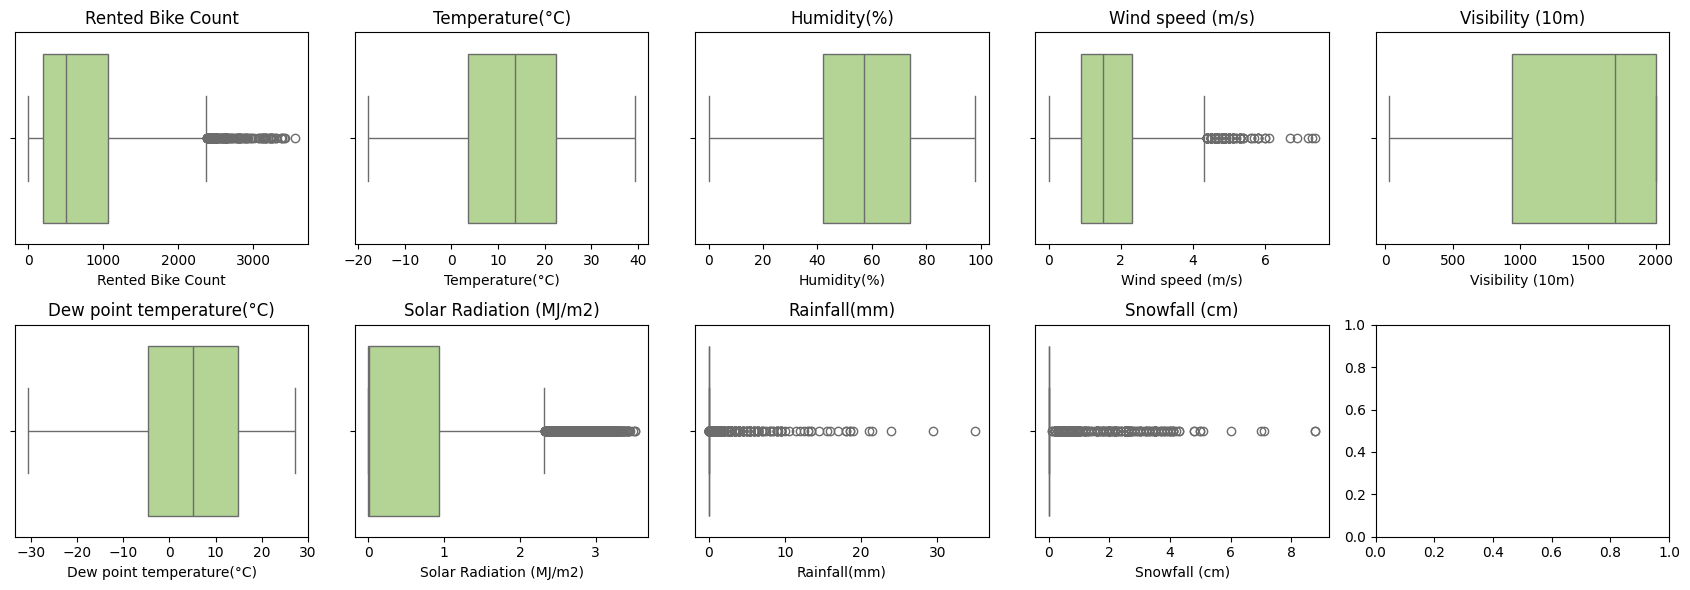

In [22]:
# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot histogram and boxplot
for i, feature in enumerate(numerical_target_features):
    sns.boxplot(x=data[feature], ax=axes[i], color = '#B2DF8A')
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [23]:
outlier_features = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

data_outlier_handled = data

for feature in outlier_features:
    Q1 = data_outlier_handled[feature].quantile(0.25)
    Q3 = data_outlier_handled[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data_outlier_handled[feature] < lower_bound) | (data_outlier_handled[feature] > upper_bound)).sum()
    print(f'{feature} Outliers: {outliers}')
    data_outlier_handled = data_outlier_handled[(data_outlier_handled[feature] >= lower_bound) & (data_outlier_handled[feature] <= upper_bound)]
print(f'Outliers that will be removed if we use IQR on all the above features: {round(((data.shape[0]-data_outlier_handled.shape[0])/data.shape[0])*100,2)}%')

Rented Bike Count Outliers: 158
Wind speed (m/s) Outliers: 161
Solar Radiation (MJ/m2) Outliers: 681
Rainfall(mm) Outliers: 512
Snowfall (cm) Outliers: 398
Outliers that will be removed if we use IQR on all the above features: 21.8%


In [24]:
#Check outliers only on the target feature

data_outlier_handled = data

Q1 = data_outlier_handled[target_feature].quantile(0.25).values[0]
Q3 = data_outlier_handled[target_feature].quantile(0.75).values[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_outlier_handled[(data_outlier_handled[target_feature[0]] < lower_bound) |
                                (data_outlier_handled[target_feature[0]] > upper_bound)]
outlier_count = len(outliers)
print(f'{target_feature[0]} Outliers: {outlier_count}')

# Filter out the outliers from the dataset
data_outlier_handled = data_outlier_handled[(data_outlier_handled[target_feature[0]] >= lower_bound) &
                                            (data_outlier_handled[target_feature[0]] <= upper_bound)]
percentage_removed = round(((data.shape[0] - data_outlier_handled.shape[0]) / data.shape[0]) * 100, 2)
print(f'Outliers that will be removed if we use IQR only on the Target feature: {percentage_removed}%')

Rented Bike Count Outliers: 158
Outliers that will be removed if we use IQR only on the Target feature: 1.8%


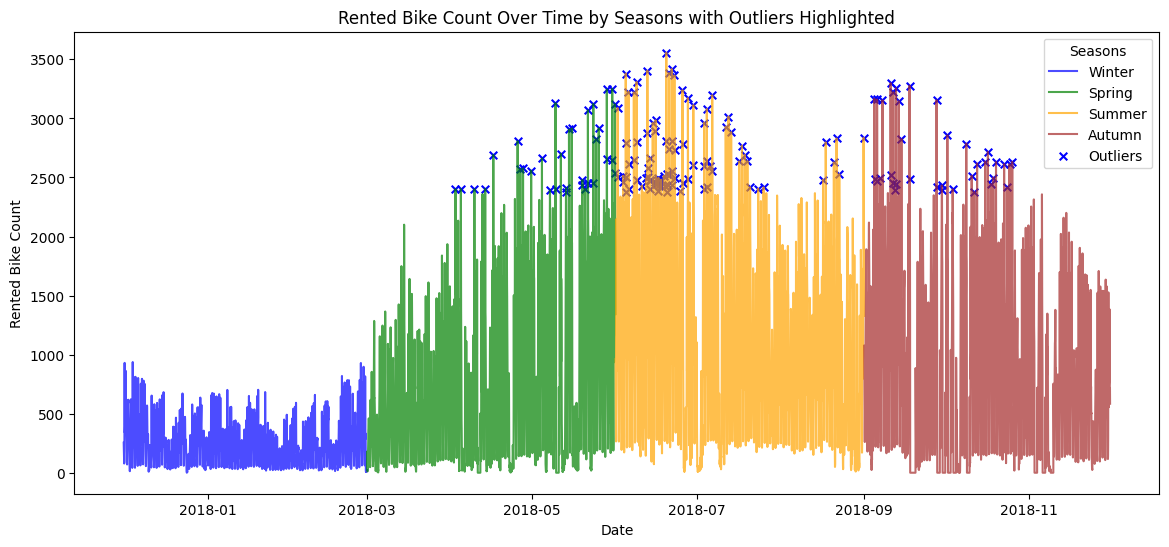

In [25]:
# Assuming 'data' also has a 'Date' column and 'Season' column as in the previous analysis
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange', 'Autumn': 'brown'}

# Plot the time series with colors based on seasons and highlight the identified outliers
plt.figure(figsize=(14, 6))
for season, color in season_colors.items():
    season_data = data[data['Seasons'] == season]
    plt.plot(season_data.index, season_data[target_feature[0]], label=season, color=color, alpha = 0.7)

# Highlight the outliers on the plot
plt.scatter(outliers.index, outliers[target_feature[0]], color='blue', label='Outliers', s=30, marker='x')

plt.title(f'{target_feature[0]} Over Time by Seasons with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel(target_feature[0])
plt.legend(title='Seasons')
plt.show()

*THOUGHT PROCESS*
* If I try to remove all outliers outside the IQR on the features containing outliers, it is removing almost 22% of the dataset which I'm not comfortable with
* In Seoul, the following is rare:
-- Wind Speed - above 15 m/s
-- Solar Radiation - above 25 MJ/m²
-- Rainfall (mm) - exceeding 100 mm
-- Snowfall(cm) - more than 10 cm

The dataset values fall well within this range, so I'm choosing to keep the outliers on these features.
* If I remove the outliers only in the Target Feature, only 1.8% of the data will be removed. But when the outliers are investigated, it looks like there is a seasonal pattern with warmer months having higher bike rentals. So, it doesn't look like an anamoly since there is a pattern, hence I'm choosing to keep the outliers.

## **Encoding Categorical Features**

In [26]:
# Display unique values
for feature in categorical_features:
  print(f'{feature}: {data[feature].unique()}')

Seasons: ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday: ['No Holiday' 'Holiday']


In [27]:
# Identify the category with the highest frequency for each feature
most_frequent_season = data['Seasons'].value_counts().idxmax()
most_frequent_holiday = data['Holiday'].value_counts().idxmax()

most_frequent_season,most_frequent_holiday

('Spring', 'No Holiday')

In [28]:
# Generate dummy variables, dropping the most frequent category in each case
data = pd.get_dummies(data, columns = categorical_features)
data = data.drop(columns=[f'Seasons_{most_frequent_season}', f'Holiday_{most_frequent_holiday}'])

#Making the dependent column as the last column
dependent_column = data.pop('Rented Bike Count')
data['Rented Bike Count'] = dependent_column
data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Hour,Day Of Week,Seasons_Autumn,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Rented Bike Count
datetime,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,0,4,False,False,True,False,254
2017-12-01 01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,1,4,False,False,True,False,204
2017-12-01 02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2,4,False,False,True,False,173
2017-12-01 03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,3,4,False,False,True,False,107
2017-12-01 04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,4,4,False,False,True,False,78


# **TRAINING AND TEST SET CREATION**

## **Train Test Split**

In [29]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X, y

(array([[-5.2, 37, 2.2, ..., False, True, False],
        [-5.5, 38, 0.8, ..., False, True, False],
        [-6.0, 39, 1.0, ..., False, True, False],
        ...,
        [2.6, 39, 0.3, ..., False, False, False],
        [2.1, 41, 1.0, ..., False, False, False],
        [1.9, 43, 1.3, ..., False, False, False]], dtype=object),
 array([254, 204, 173, ..., 694, 712, 584]))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 16), (1752, 16), (7008,), (1752,))

## **Linear Regression Assumptions Check - 1**
* LINEARITY - The relationship between the independent and dependent variables should be linear.
* NO MULTICOLLINEARITY - Independent variables should not be too highly correlated with each other.
* Rest of the assumptions will be checked after model fitting

In [32]:
# Creating a function to convert X_train/X_test to a dataframe for convenience while checking Linear Regression assumptions.
# This function is only valid if the array has the same numer of columns as data dataframe
def convert_to_dataframe(X_train):
    # Convert X_train back to a DataFrame
    X_train_df = pd.DataFrame(X_train, columns=[data.columns[i] for i in range(X_train.shape[1])])
    return X_train_df

X_train_df = convert_to_dataframe(X_train)

### LINEARITY


The scatterplot analysis suggests some features (temperature and dew point temperature) have a reasonably linear relationship with the target variable. However, other features like humidity, wind speed, and visibility show weaker or more ambiguous linear trends. Let's confirm if that's the case with the training set as well

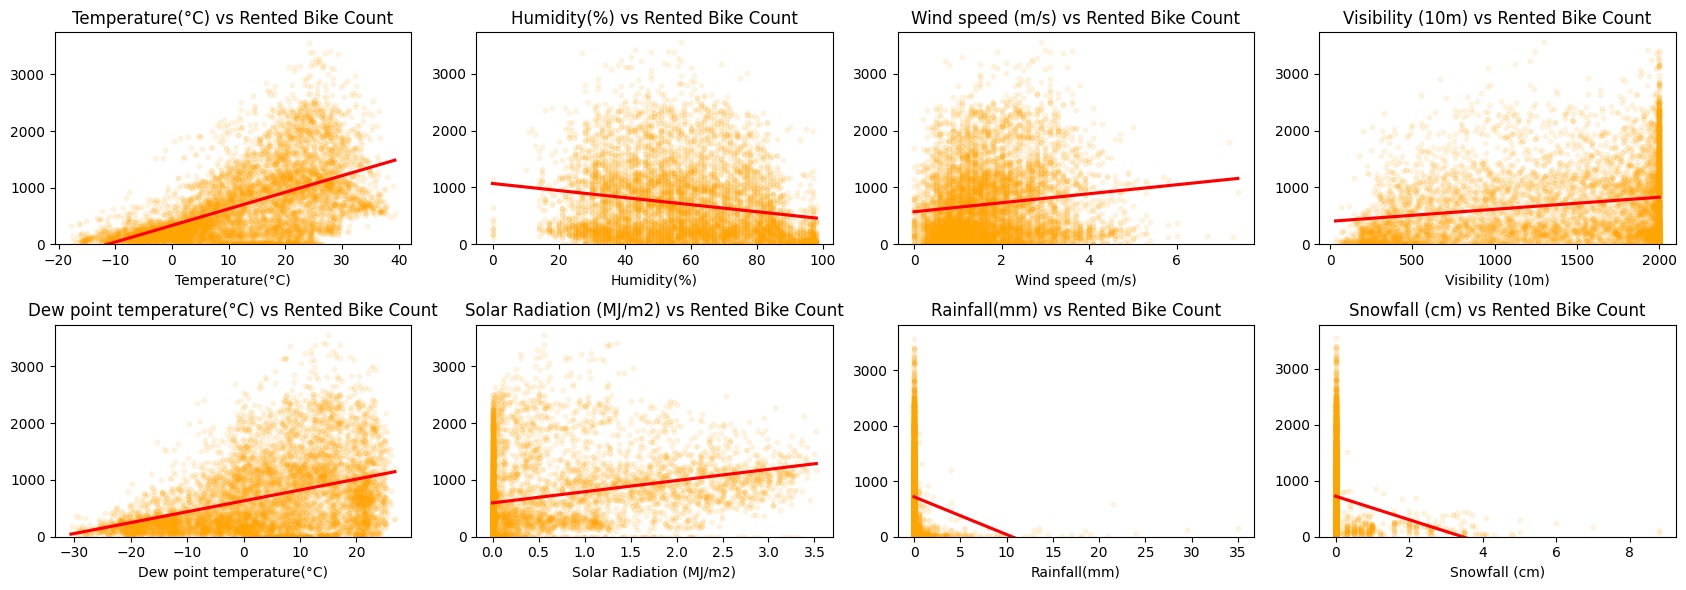

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 6))

axes = axes.flatten()

# Iterate through numerical features and plot scatterplots
for i, feature in enumerate(numerical_features):
  sns.regplot(x=X_train_df[feature].astype(float), y=y_train, ax=axes[i], ci=None,
                line_kws={"color":"red"}, scatter_kws={"color": "orange", "marker": "x", "s": 10, "alpha": 0.1})
  axes[i].set_title(f'{feature} vs {target_feature[0]}')
  axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

*THOUGHT PROCESS*
* The trend holds true for the training set as well.
* I'm going to hold off on doing any feature transformations until I check the rest of the assumptions

### MULTICOLLINEARITY



The correlation matrix showed a high correlation between Temperature and Dew. Let's confirm it with Variance Inflation Factor (VIF) on the training data

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#Create a function to calculate vif so that it can be reused
def calculate_vif(X_train_df, numerical_features):
    # Select only numerical features from X_train_df
    X_train_numerical = X_train_df[numerical_features].apply(pd.to_numeric)

    # Add a constant column for the VIF calculation
    X_train_numerical_with_const = sm.add_constant(X_train_numerical)

    # Calculate VIF for each numerical feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train_numerical_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_numerical_with_const.values, i) for i in range(X_train_numerical_with_const.shape[1])]

    # Remove the VIF for the constant term
    vif_data = vif_data.drop(0).reset_index(drop=True)

    return vif_data

In [35]:
#Check VIF
vif_results = calculate_vif(X_train_df, numerical_features)
vif_results

,Feature,VIF
0,Temperature(°C),88.887514
1,Humidity(%),20.971988
2,Wind speed (m/s),1.206592
3,Visibility (10m),1.576005
4,Dew point temperature(°C),118.170094
5,Solar Radiation (MJ/m2),1.983198
6,Rainfall(mm),1.078470
7,Snowfall (cm),1.094943


*THOUGHT PROCESS*
* Given the high correlation observed in the Correlation matrix between Temperature and Dew, and confirmed by the VIF analysis now, I'm going to remove the Dew column, as it has the highest VIF. A VIF value greater than 5 or 10 typically indicates high multicollinearity.
* Additional reason to remove the Dew column: It also showed a moderate correlation with Humidity unlike Temperature.

In [36]:
#Drop Dew feature and check for VIF
features_to_remove = ['Dew point temperature(°C)']

X_train_df = X_train_df.drop(columns=features_to_remove)
numerical_features = [feature for feature in numerical_features if feature not in features_to_remove]

#Check VIF with reduced features
vif_results = calculate_vif(X_train_df, numerical_features)
vif_results

,Feature,VIF
0,Temperature(°C),1.556478
1,Humidity(%),2.410136
2,Wind speed (m/s),1.203919
3,Visibility (10m),1.560561
4,Solar Radiation (MJ/m2),1.901261
5,Rainfall(mm),1.063541
6,Snowfall (cm),1.089153


*RESULT*
* Removing Dew feature has massively reduced the other features VIF, with the maximum value being around 2.4, indicating there is no noticeable multicollinearity among the current features, thus satisfying the No Multicollinearity assumption.
* So, moving forward, Dew feature won't be considered.

## **Process X_train and X_test**

In [37]:
X_train_df.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Hour,Day Of Week,Seasons_Autumn,Seasons_Summer,Seasons_Winter,Holiday_Holiday
0,8.2,62,0.6,291,1.22,0.0,0.0,2,23,15,4,False,False,True,False
1,28.4,57,2.4,2000,0.84,0.0,0.0,8,31,18,4,False,True,False,False
2,29.9,57,1.7,1992,0.88,0.1,0.0,8,23,11,3,False,True,False,False
3,14.8,29,0.6,1749,2.2,0.0,0.0,4,25,10,2,False,False,False,False
4,12.2,47,1.1,2000,0.0,0.0,0.0,10,17,20,2,True,False,False,False


In [38]:
#Process X_test. X_train had features removed in the previous step
X_test_df = convert_to_dataframe(X_test)
X_test_df = X_test_df.drop(columns=features_to_remove)

#Convert them back to numpy arrays
X_train=X_train_df.values
X_test=X_test_df.values

In [39]:
X_train.shape, X_test.shape

((7008, 15), (1752, 15))

In [40]:
X_train[0]

array([8.2, 62, 0.6, 291, 1.22, 0.0, 0.0, 2, 23, 15, 4, False, False,
       True, False], dtype=object)

# **FEATURE SCALING**

## **SHAHEER TO REVIEW**

### Applying scaling on all features in X_train

In [41]:
X_train

array([[8.2, 62, 0.6, ..., False, True, False],
       [28.4, 57, 2.4, ..., True, False, False],
       [29.9, 57, 1.7, ..., True, False, False],
       ...,
       [25.5, 57, 1.8, ..., True, False, False],
       [8.3, 59, 2.1, ..., False, False, False],
       [7.1, 83, 3.3, ..., False, False, False]], dtype=object)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Applying Feature Scaling on the whole X_train
X_all_features_scaled = sc.fit_transform(X_train)
X_all_features_scaled

array([[-0.38874606,  0.18996015, -1.08168277, ..., -0.57910781,
         1.7507042 , -0.23202281],
       [ 1.29850393, -0.05608294,  0.64784699, ...,  1.72679419,
        -0.57119872, -0.23202281],
       [ 1.42379477, -0.05608294, -0.02474792, ...,  1.72679419,
        -0.57119872, -0.23202281],
       ...,
       [ 1.05627497, -0.05608294,  0.07133707, ...,  1.72679419,
        -0.57119872, -0.23202281],
       [-0.38039334,  0.0423343 ,  0.35959203, ..., -0.57910781,
        -0.57119872, -0.23202281],
       [-0.48062601,  1.22334111,  1.51261186, ..., -0.57910781,
        -0.57119872, -0.23202281]])

### Applying scaling only on Numerical features in X_train

In [43]:
#We want to  apply feature scaling only on the numerical features and not on categorical as they are encoded. We are going to scale time series as well as we are using them as raw numerical values instead of categorical encoding or cyclic transformations
#Combining numerical and time series features for feature scaling.
numerical_time_combined = numerical_features.copy()
numerical_time_combined.extend(time_series_features)

#Since X_train is a numpy array, we can access the column only through the indices. So, we need to find the column indices
numerical_time_combined_indices = X_train_df.columns.get_indexer(numerical_time_combined)

In [44]:
from sklearn.preprocessing import StandardScaler
#Creating a function to scale numerical features to reuse with X_test
def scale_numerical_features(X_train):
    sc = StandardScaler()
    X_numerical_scaled = sc.fit_transform(X_train[:, numerical_time_combined_indices])

    # Replace the numerical features in X_train with the scaled values
    X_train[:, numerical_time_combined_indices] = X_numerical_scaled

    return X_train

X_train = scale_numerical_features(X_train)
X_train

array([[-0.38874606033890213, 0.1899601491798979, -1.0816827653497283,
        ..., False, True, False],
       [1.2985039264857494, -0.05608293762243903, 0.6478469870018891,
        ..., True, False, False],
       [1.4237947670915405, -0.05608293762243903, -0.02474791669040655,
        ..., True, False, False],
       ...,
       [1.0562749679812202, -0.05608293762243903, 0.07133706955135007,
        ..., True, False, False],
       [-0.3803933376318493, 0.04233429709849573, 0.3595920282766197,
        ..., False, False, False],
       [-0.48062601011648215, 1.223341113749713, 1.5126118631776977, ...,
        False, False, False]], dtype=object)

### Scaling result

In [45]:
print(f'X_train when all features are scaled:\n {X_all_features_scaled[0]}\n')
print(f'X_train when only numerical features are scaled:\n {X_train[0]}\n')

X_train when all features are scaled:
 [-0.38874606  0.18996015 -1.08168277 -1.88204143  0.73881224 -0.12713515
 -0.17269367 -1.31172725  0.82237763  0.50774916  0.50775201 -0.58042598
 -0.57910781  1.7507042  -0.23202281]

X_train when only numerical features are scaled:
 [-0.38874606033890213 0.1899601491798979 -1.0816827653497283
 -1.882041433474724 0.738812238886852 -0.1271351545890945
 -0.1726936683166693 -1.3117272454223092 0.8223776331064058
 0.5077491599273276 0.507752007541477 False False True False]

